<a href="https://colab.research.google.com/github/qwu3/qtm151spring2023/blob/main/QTM_151_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QTM 151 Final Project

## Introduction:







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from   matplotlib import style
from   matplotlib import ticker
import matplotlib.dates as mdates

## Read Datasets

In [ ]:
results = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/QTM_151_data_raw/results.csv")
drivers = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/QTM_151_data_raw/drivers.csv")
constructor_result = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/QTM_151_data_raw/constructor_results.csv")
constructors = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/QTM_151_data_raw/constructors.csv")
races = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/QTM_151_data_raw/races.csv")

## Merge Datasets
Filter out top 5 constructors in recent 2012-2022


In [ ]:
result_constructors = pd.merge(results,
                       constructors[["constructorId","constructorRef","nationality"]],
                       on = "constructorId",
                       how = "left")

result_constructors_year = pd.merge(result_constructors,
                                    races [["raceId","year"]],
                                    on = "raceId",
                                    how = "left")
display(result_constructors_year)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,nationality,year
0,1,18,1,1,22,1,1,1,1,10.0,...,1:34:50.616,5690616,39,2,1:27.452,218.300,1,mclaren,British,2008
1,2,18,2,2,3,5,2,2,2,8.0,...,+5.478,5696094,41,3,1:27.739,217.586,1,bmw_sauber,German,2008
2,3,18,3,3,7,7,3,3,3,6.0,...,+8.163,5698779,41,5,1:28.090,216.719,1,williams,British,2008
3,4,18,4,4,5,11,4,4,4,5.0,...,+17.181,5707797,58,7,1:28.603,215.464,1,renault,French,2008
4,5,18,5,1,23,3,5,5,5,4.0,...,+18.014,5708630,43,1,1:27.418,218.385,1,mclaren,British,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,...,\N,\N,39,12,1:29.833,211.632,11,haas,American,2022
25836,25842,1096,825,210,20,16,17,17,17,0.0,...,\N,\N,40,20,1:31.158,208.556,11,haas,American,2022
25837,25843,1096,1,131,44,5,18,18,18,0.0,...,\N,\N,42,11,1:29.788,211.738,9,mercedes,German,2022
25838,25844,1096,849,3,6,20,19,19,19,0.0,...,\N,\N,45,14,1:30.309,210.517,130,williams,British,2022


## Manipulating Data
--
We first filter out the years of F1 race between 2012 to 2022
--
Then we calculate the every constructor's total point in each year
--
Next we pivot the table to wide format in order to calculate and rank from highest to lowest

In [ ]:
# Filter the race results to include only the years 2012 to 2022
result_agg_year = result_constructors_year.query("(year >= 2012) & (year <= 2022)")

# Group the results by constructor, year, and sum the points
results_agg = (result_agg_year.groupby(["constructorId","constructorRef","year"])
                       .agg(points_each_year = ('points','sum')))

display(results_agg)


points_each_year
constructorId constructorRef year                  
1             mclaren        2012             378.0
                             2013             122.0
                             2014             181.0
                             2015              27.0
                             2016              76.0
...                                             ...
213           alphatauri     2020             107.0
                             2021             142.0
                             2022              35.0
214           alpine         2021             155.0
                             2022             170.0

[115 rows x 1 columns]

In [ ]:
# Pivot the data to create a wide format table
results_agg_wide = (pd.pivot_table(results_agg,
                           index='constructorRef',
                           columns='year',
                           values='points_each_year'))

results_agg_wide['total points'] = results_agg.groupby('constructorRef')['points_each_year'].sum()
results_agg_wide = results_agg_wide.sort_values("total points",ascending = False)

display(results_agg_wide)

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,total points
constructorRef,,,,,,,,,,,,
mercedes,142.0,360.0,701.0,703.0,765.0,668.0,655.0,739.0,573.0,604.5,495.0,6405.5
red_bull,460.0,596.0,405.0,187.0,468.0,368.0,419.0,417.0,319.0,578.5,724.0,4941.5
ferrari,400.0,354.0,216.0,428.0,398.0,522.0,571.0,504.0,131.0,322.5,519.0,4365.5
mclaren,378.0,122.0,181.0,27.0,76.0,30.0,62.0,145.0,202.0,274.0,150.0,1647.0
force_india,109.0,77.0,155.0,136.0,173.0,187.0,111.0,NaN,NaN,NaN,NaN,948.0
williams,76.0,5.0,320.0,257.0,138.0,83.0,7.0,1.0,0.0,23.0,8.0,918.0
lotus_f1,303.0,315.0,10.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,706.0
renault,NaN,NaN,NaN,NaN,8.0,57.0,122.0,91.0,181.0,NaN,NaN,459.0
toro_rosso,26.0,33.0,30.0,67.0,63.0,53.0,33.0,85.0,NaN,NaN,NaN,390.0


# Filter out top 3 team

In [ ]:
results_agg_wide_3 = results_agg_wide.head(3)
display(results_agg_wide_3)

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,total points
constructorRef,,,,,,,,,,,,
mercedes,142.0,360.0,701.0,703.0,765.0,668.0,655.0,739.0,573.0,604.5,495.0,6405.5
red_bull,460.0,596.0,405.0,187.0,468.0,368.0,419.0,417.0,319.0,578.5,724.0,4941.5
ferrari,400.0,354.0,216.0,428.0,398.0,522.0,571.0,504.0,131.0,322.5,519.0,4365.5


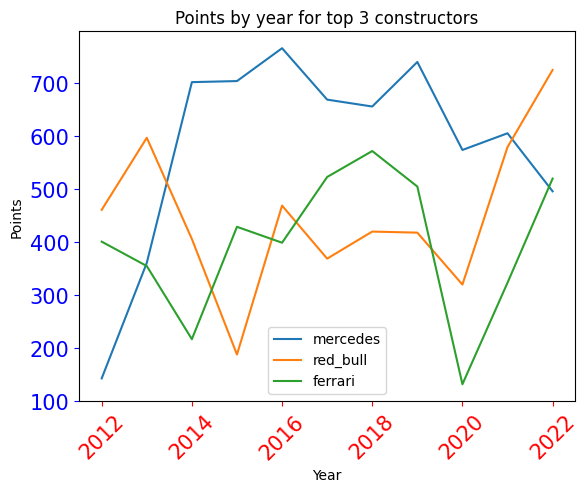

In [ ]:

fig, ax = plt.subplots(1,1)
ax.plot(results_agg_wide_3.loc[:, [2012, 2013, 2014,2015,2016,2017,2018,2019,2020,2021,2022]].T)
ax.legend(results_agg_wide_3.index)
ax.set_xlabel("Year")
ax.set_ylabel("Points")
ax.set_title("Points by year for top 3 constructors")


# labelpad is the space between the labels and the numbers
ax.xaxis.set_tick_params(labelsize = 15,
                         rotation=45,
                         colors = "red")
ax.yaxis.set_tick_params(labelsize = 15,
                         rotation=0,
                         colors = "blue")